# Activity 1: Logistic Regression with one feature (Binary Classification)


In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
print(iris.feature_names)
print(iris.data[:5,:])
x=iris['data'][:,3:]
y=(iris['target']==2).astype(int)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x,y)
prediction=lr.predict(x)
accuracy_score(y,prediction)

0.96

[0.99925002 0.9992402  0.99923026 0.99922018 0.99920998]
[0.00074998 0.0007598  0.00076974 0.00077982 0.00079002]


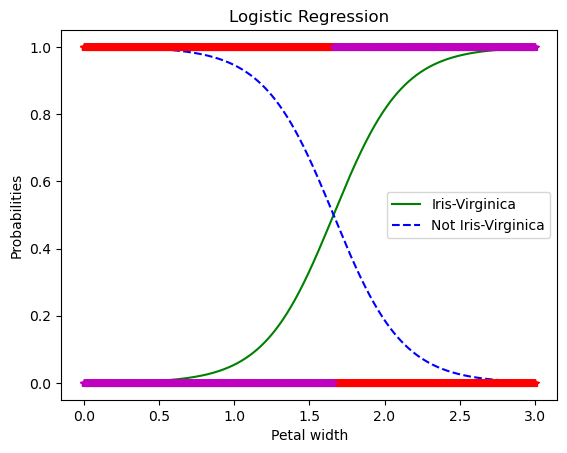

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)
p_X = lr.predict(X_new)

print(y_proba[:5, 0])
print(y_proba[:5, 1])

ax.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
ax.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
ax.plot(X_new, p_X==0, "r*")
ax.plot(X_new, p_X==1, "m*")
ax.set(xlabel="Petal width", ylabel="Probabilities", title="Logistic Regression")
ax.legend(loc="center right");

# Activity 2: Logistic Regression with two features and Decision Boundary (Binary Classification)

In [4]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
x=iris['data'][:,:2]
y=(iris['target']==2)

In [5]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x,y)
prediction=lr.predict(x)
accuracy_score(y,prediction)

0.8

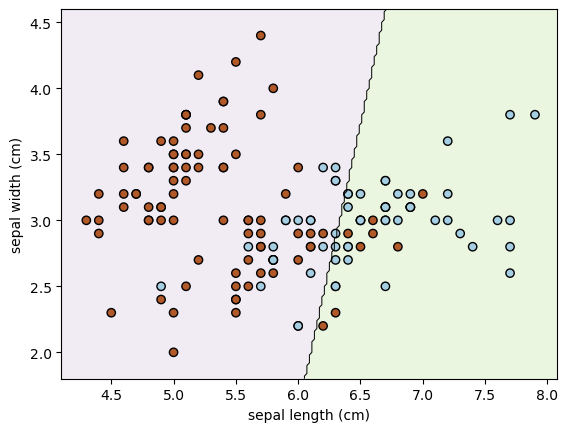

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    fig, ax = plt.subplots()
    h = 0.02
    x1_min, x1_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    x2_min, x2_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx1, xx2, Z, colors='k', linewidths=0.7)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
    ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')

# Assuming log_reg, X, and y are defined elsewhere
plot_decision_boundary(lr, x, y)
plt.show()


# Multi class Classification

# One Vrs. All Model

In [7]:
from sklearn.datasets import load_digits

# Loading the dataset
mnist = load_digits()
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)


(1797, 64) (1797,)


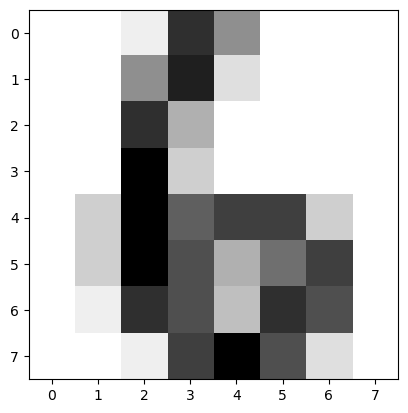

Label for this digit: 6


In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Loading the dataset
mnist = load_digits()
X, y = mnist["data"], mnist["target"]

some_digit = X[360]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

print("Label for this digit:", y[360])


In [10]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = X[:1300], X[1300:], y[:1300], y[1300:]
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)
some_digit = X_test[0]

prediction = sgd_clf.predict([some_digit])
print(prediction)


[False]


In [13]:
sgd_clf.fit(X_train, y_train)
prediction = sgd_clf.predict([some_digit])
print("Prediction:", prediction)
some_digit_scores = sgd_clf.decision_function([some_digit])
print("Decision Scores:", some_digit_scores)


Prediction: [3]
Decision Scores: [[-2565.80335901 -2709.31928498 -2444.60560626  2755.2082365
  -6490.22556229 -2085.72963189 -3991.42996301 -2477.43101462
  -1617.94254177 -1075.52744808]]


# OvA with Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

p_X = log_reg.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, p_X))

some_digit_scores = log_reg.decision_function([some_digit])
print("Decision Scores:", some_digit_scores)
print("Prediction:", log_reg.predict([some_digit]))


Accuracy Score: 0.9195171026156942
Decision Scores: [[ -2.36812912 -10.35070426   3.44834759  22.65479623 -22.33136106
    7.04971953 -12.79589844   5.27032309   0.53402707   8.88887938]]
Prediction: [3]


C:\Users\Qadri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
